# Планирование эксперемента, дискретные переменные

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Одинаковые выборки

## Evan Miller test (оцениваем размер выборок)

H0: разницы между группами нет и выборки пришли из одного распеределния
H1: разница есть

Оценим размер выборки с помощью Evan Miller test. Для начала выберем уровень конверсии (Baseline conversion rate). Пусть он будет равен 20 %. Также выберем уровень желаемой конверсии (Minimum Detectable Effect) 5%. Мощность (Statistical power 1−β) будет 80%, которая покажет, уровень успешных эксперементов (1 - ошибка второго рода(принимаем ложную гипотезу)). И уровень статистической значимости (Significance level α) 5%, который покажет, что разница между двумя вариантами неслучайна (ошибка первого рода, которая покажет вероятность отвергнуть вероятность отвергнуть верную нулевую гепотезу).

In [6]:
mde = 0.05
baseline = 0.2
sample_size = 1030

## Оцениваем размер выборок с помощью Python

In [7]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))
sample_size

1092

## Z test  (=Chi square test)

In [9]:
from statsmodels.stats.proportion import proportions_ztest
from tqdm.notebook import tqdm
# шкала прогресса 

In [10]:
sample_size = 1092

In [11]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

In [12]:
z = pd.Series(result)

<AxesSubplot:>

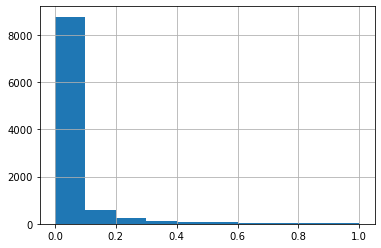

In [13]:
z.hist()

In [14]:
# Получим мощность
(z < 0.05).mean()

0.8041

### Проведем А/А тест

In [15]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

In [19]:
import seaborn as sns

In [16]:
z = pd.Series(result)

<AxesSubplot:ylabel='Proportion'>

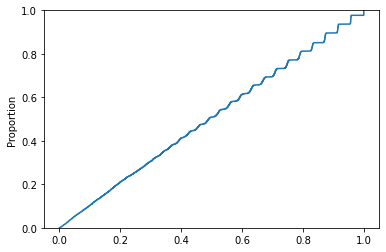

In [20]:
sns.ecdfplot(z)
# Должен выглядеть как прямая линия

Проверим ошибку первого рода (уровень значимости)

In [21]:
(z < 0.05).mean()

0.0525

## T test

In [22]:
from scipy.stats import ttest_ind

In [23]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

In [24]:
t = pd.Series(result)

<AxesSubplot:>

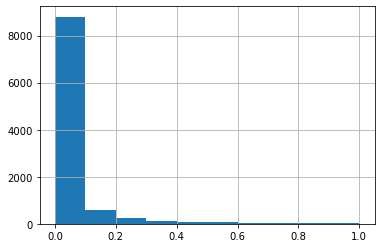

In [25]:
t.hist()

In [26]:
(t < 0.05).mean()

0.8032

### Проведем А/А тест

In [27]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

In [28]:
t = pd.Series(result)

<AxesSubplot:ylabel='Proportion'>

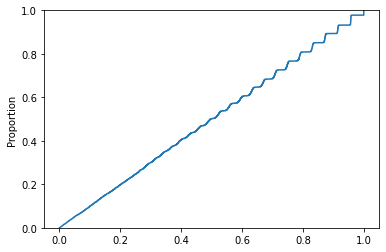

In [30]:
sns.ecdfplot(t)
# Должен выглядеть как прямая линия

Проверим ошибку первого рода (уровень значимости)

In [31]:
(t < 0.05).mean()

0.0506

## Mann-Whitneyu test

In [32]:
from scipy.stats import mannwhitneyu

In [33]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

In [34]:
mn = pd.Series(result)

<AxesSubplot:>

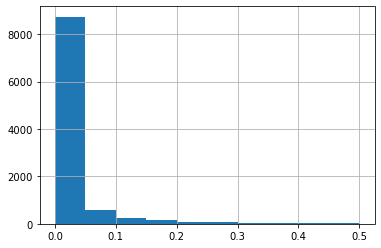

In [35]:
mn.hist()

In [36]:
(mn < 0.05).mean()

0.874

### Проведем А/А тест

In [37]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

In [38]:
mn = pd.Series(result)

In [39]:
import seaborn as sns

<AxesSubplot:ylabel='Proportion'>

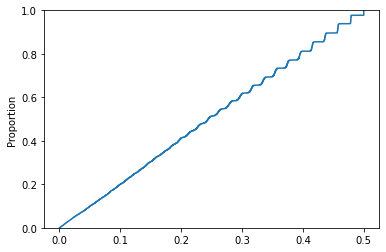

In [40]:
sns.ecdfplot(mn)
# Должен выглядеть как прямая линия

Проверим ошибку первого рода (уровень значимости)

In [41]:
(mn < 0.05).mean()

0.0994

# Разные по размеру выборки

Пусть контрольная группа будет в 4 раза меньше, чем тестируемая и отношение будет 1/4.
Оценим размер выборки

In [42]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/4))
sample_size1

2730

вторая группа будет:

In [43]:
sample_size2 = round(2730 * 1/4)

In [44]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

In [45]:
z = pd.Series(result)

In [46]:
(z < 0.05).mean()

0.8053

Мощность - проведем 1000 успешных и правильных покажет 80%. 1- ошибка второго рода.
Альфа - проведем 1000 неуспешных тестов и покажет 5% правильных. ошибка первого рода.

# Сбалансированные классы

Сделаем пример на сбалансированных класах.

Будем случайным образом генерировать успешный эксперимент или нет. Если получается 1 - неуспешный эксперимент, сохраняем результат с 0.

In [47]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
# отношение успешных и неуспешных
class_balance = 0.5
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

In [48]:
z = pd.DataFrame(result,columns=['y_true','y_score'])

In [49]:
z['y_true'].mean()

0.5005

In [50]:
z['y_pred'] = (z['y_score'] < 0.05)*1

In [51]:
z

,y_true,y_score,y_pred
0,0,0.713074,0
1,1,0.000072,1
2,0,0.747589,0
3,1,0.334095,0
4,1,0.000064,1
...,...,...,...
9995,0,0.506689,0
9996,0,0.075445,0
9997,0,0.230608,0
9998,1,0.446362,0


In [52]:
from sklearn.metrics import classification_report

In [53]:
# посмотрим метрики классификации
print(classification_report(z['y_true'],z['y_pred']))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4995
           1       0.94      0.80      0.87      5005

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



recall 1 - мощность
recall 0 - 1-ошибка перовго рода (только 95% нулей пометились как нули)

Определим вероятность того, что если тест нам показал в 'y_pred' единицу, какова вероятность того, что это действительно единица? - precision 1

In [54]:
z[z['y_pred'] == 1]['y_true'].mean()

0.9435559736594544

# Изменим баланс классов

In [55]:
sample_size = 1090
baseline = 0.2
mde = 0.05
result = []
# отношение успешных и неуспешных 0.9 - неуспешных
class_balance = 0.90
for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

In [56]:
z = pd.DataFrame(result,columns=['y_true','y_score'])

In [57]:
z['y_true'].mean()

0.0998

In [58]:
z['y_pred'] = (z['y_score'] < 0.05)*1

In [59]:
# посмотрим метрики классификации
print(classification_report(z['y_true'],z['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9002
           1       0.63      0.80      0.71       998

    accuracy                           0.93     10000
   macro avg       0.81      0.87      0.84     10000
weighted avg       0.94      0.93      0.94     10000



recall 1 - мощность
recall 0 - 1-ошибка перовго рода (только 95% нулей пометились как нули)

Определим вероятность того, что если тест нам показал в 'y_pred' единицу, какова вероятность того, что это действительно единица? - precision 1

In [60]:
z[z['y_pred'] == 1]['y_true'].mean()

0.6346306592533757